https://www.nytimes.com/2024/09/26/learning/whats-going-on-in-this-graph-oct-9-2024.html

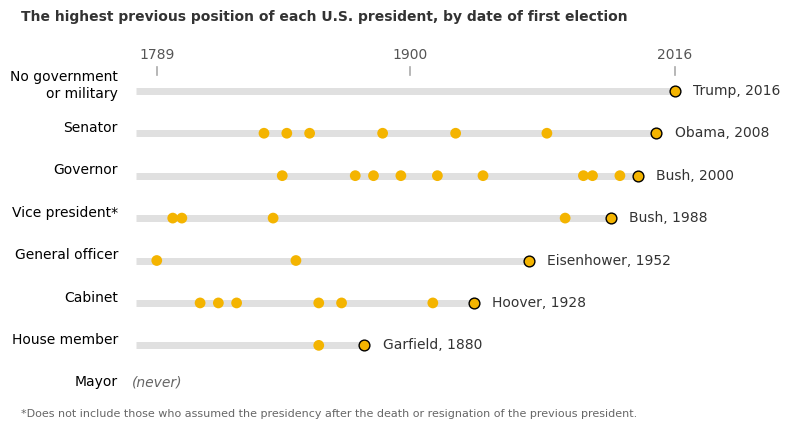

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
presidents_data = [
    {"name": "Trump", "year": 2016, "position": "No government\nor military"},
    # Senators
    {"year": 1836, "position": "Senator"}, {"year": 1846, "position": "Senator"}, {"year": 1856, "position": "Senator"},
    {"year": 1888, "position": "Senator"}, {"year": 1920, "position": "Senator"}, {"year": 1960, "position": "Senator"},
    {"name": "Obama", "year": 2008, "position": "Senator"},
    # Governors
    {"year": 1844, "position": "Governor"}, {"year": 1876, "position": "Governor"},
    {"year": 1884, "position": "Governor"}, {"year": 1896, "position": "Governor"},
    {"year": 1912, "position": "Governor"}, {"year": 1932, "position": "Governor"},
    {"year": 1976, "position": "Governor"}, {"year": 1992, "position": "Governor"},
    {"name": "Bush", "year": 1980, "position": "Governor"}, {"name": "Bush", "year": 2000, "position": "Governor"},
    # Vice Presidents
    {"year": 1796, "position": "Vice president*"}, {"year": 1800, "position": "Vice president*"},
    {"year": 1840, "position": "Vice president*"}, {"year": 1968, "position": "Vice president*"},
    {"name": "Bush", "year": 1988, "position": "Vice president*"},
    # Officers
    {"year": 1789, "position": "General officer"}, {"year": 1850, "position": "General officer"},
    {"name": "Eisenhower", "year": 1952, "position": "General officer"},
    # Cabinet
    {"year": 1808, "position": "Cabinet"}, {"year": 1816, "position": "Cabinet"}, {"year": 1824, "position": "Cabinet"},
    {"year": 1860, "position": "Cabinet"}, {"year": 1870, "position": "Cabinet"},
    {"year": 1910, "position": "Cabinet"}, {"name": "Hoover", "year": 1928, "position": "Cabinet"},
    # House Members
    {"year": 1860, "position": "House member"}, {"name": "Garfield", "year": 1880, "position": "House member"},
]

df = pd.DataFrame(presidents_data)

# Order of categories from top to bottom
categories_ordered = [
    "No government\nor military", "Senator", "Governor", "Vice president*",
    "General officer", "Cabinet", "House member", "Mayor"
]

# Reverse the order so 'Mayor' is at the bottom
categories_plot = categories_ordered[::-1]
num_categories = len(categories_plot)

# === CONTROL VERTICAL SPACING BETWEEN ROWS ===
spacing = 0.8  # Lower = tighter rows
category_to_y = {cat: i * spacing for i, cat in enumerate(categories_plot)}
y_positions = [category_to_y[cat] for cat in categories_plot]

# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 5))  # Width/height
fig.set_facecolor('white')
ax.set_facecolor('white')

# Set y-axis ticks and labels
ax.set_yticks(y_positions)
ax.tick_params(axis='y', which='both', length=0, pad=5)
ax.set_yticklabels(categories_plot, fontsize=10, ha='right', va='center', fontweight='light')
ax.spines['left'].set_visible(False)

# Horizontal gray lines for timelines
line_color = '#e0e0e0'
xmin_axis = 1775
xmax_axis = 2045

for cat in categories_plot:
    y = category_to_y[cat]
    points_in_cat = df[(df['position'] == cat) & (df['year'].notna())]
    if not points_in_cat.empty:
        xmin_line = 1780
        xmax_line = points_in_cat['year'].max()
        # === LINE WIDTH OF GRAY TIMELINES ===
        ax.hlines(y=y - 0.1, xmin=xmin_line, xmax=xmax_line, color=line_color,
                  linestyle='-', linewidth=5, alpha=1, zorder=1)
    elif cat == "Mayor":
        # Special label if no data
        ax.text(xmin_axis + 3, y, "(never)", fontsize=10, va='center', ha='left', color='#666666', fontstyle='italic')

# Remove X-axis spines and ticks
ax.set_xlim(xmin_axis, xmax_axis)
ax.set_ylim(-0.5, spacing * (num_categories - 1) + 0.5)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([])

# Vertical year markers (top of chart)
top_ax_y = spacing * (num_categories - 1) + 0.2
tick_length = 0.15
label_offset_y = 0.1
tick_years = [1789, 1900, 2016]
for year in tick_years:
    ax.plot([year, year], [top_ax_y, top_ax_y + tick_length], color='#aaaaaa', lw=1.2, clip_on=False)
    ax.text(year, top_ax_y + tick_length + label_offset_y, str(year),
            ha='center', va='bottom', fontsize=10, color='#555555')

# Highlight the latest point in each category with name label
latest_points = df.loc[df.groupby("position")["year"].idxmax()]
for _, row in df.iterrows():
    if pd.notna(row["year"]) and row["position"] in category_to_y:
        y = category_to_y[row["position"]] - 0.1
        is_latest = any((latest_points["position"] == row["position"]) & (latest_points["year"] == row["year"]))
        ax.scatter(
            row["year"], y,
            color='#f4b400', s=60, zorder=3,
            edgecolors='black' if is_latest else 'none',
            linewidths=1.0 if is_latest else 0
        )
        if is_latest and pd.notna(row.get("name")):
            label_x_pos = row["year"] + 8
            ax.text(label_x_pos, y, f"{row['name']}, {int(row['year'])}",
                    fontsize=10, va='center', ha='left', color='#333333')

# Margins inside the figure
plt.subplots_adjust(left=0.18, right=0.95, top=0.85, bottom=0.15)

# Chart title and footer
fig.text(0.05, 0.92,
         "The highest previous position of each U.S. president, by date of first election",
         fontsize=10, fontweight='bold', ha='left', va='bottom', color='#333333')

fig.text(0.05, 0.15,
         "*Does not include those who assumed the presidency after the death or resignation of the previous president.",
         fontsize=8, ha='left', va='top', color='#666666')

plt.show()

<img src="https://static01.nyt.com/images/2024/10/10/learning/PresidentPreviousPositionGraph/PresidentPreviousPositionGraph-jumbo.png?quality=75&auto=webp" width=800>

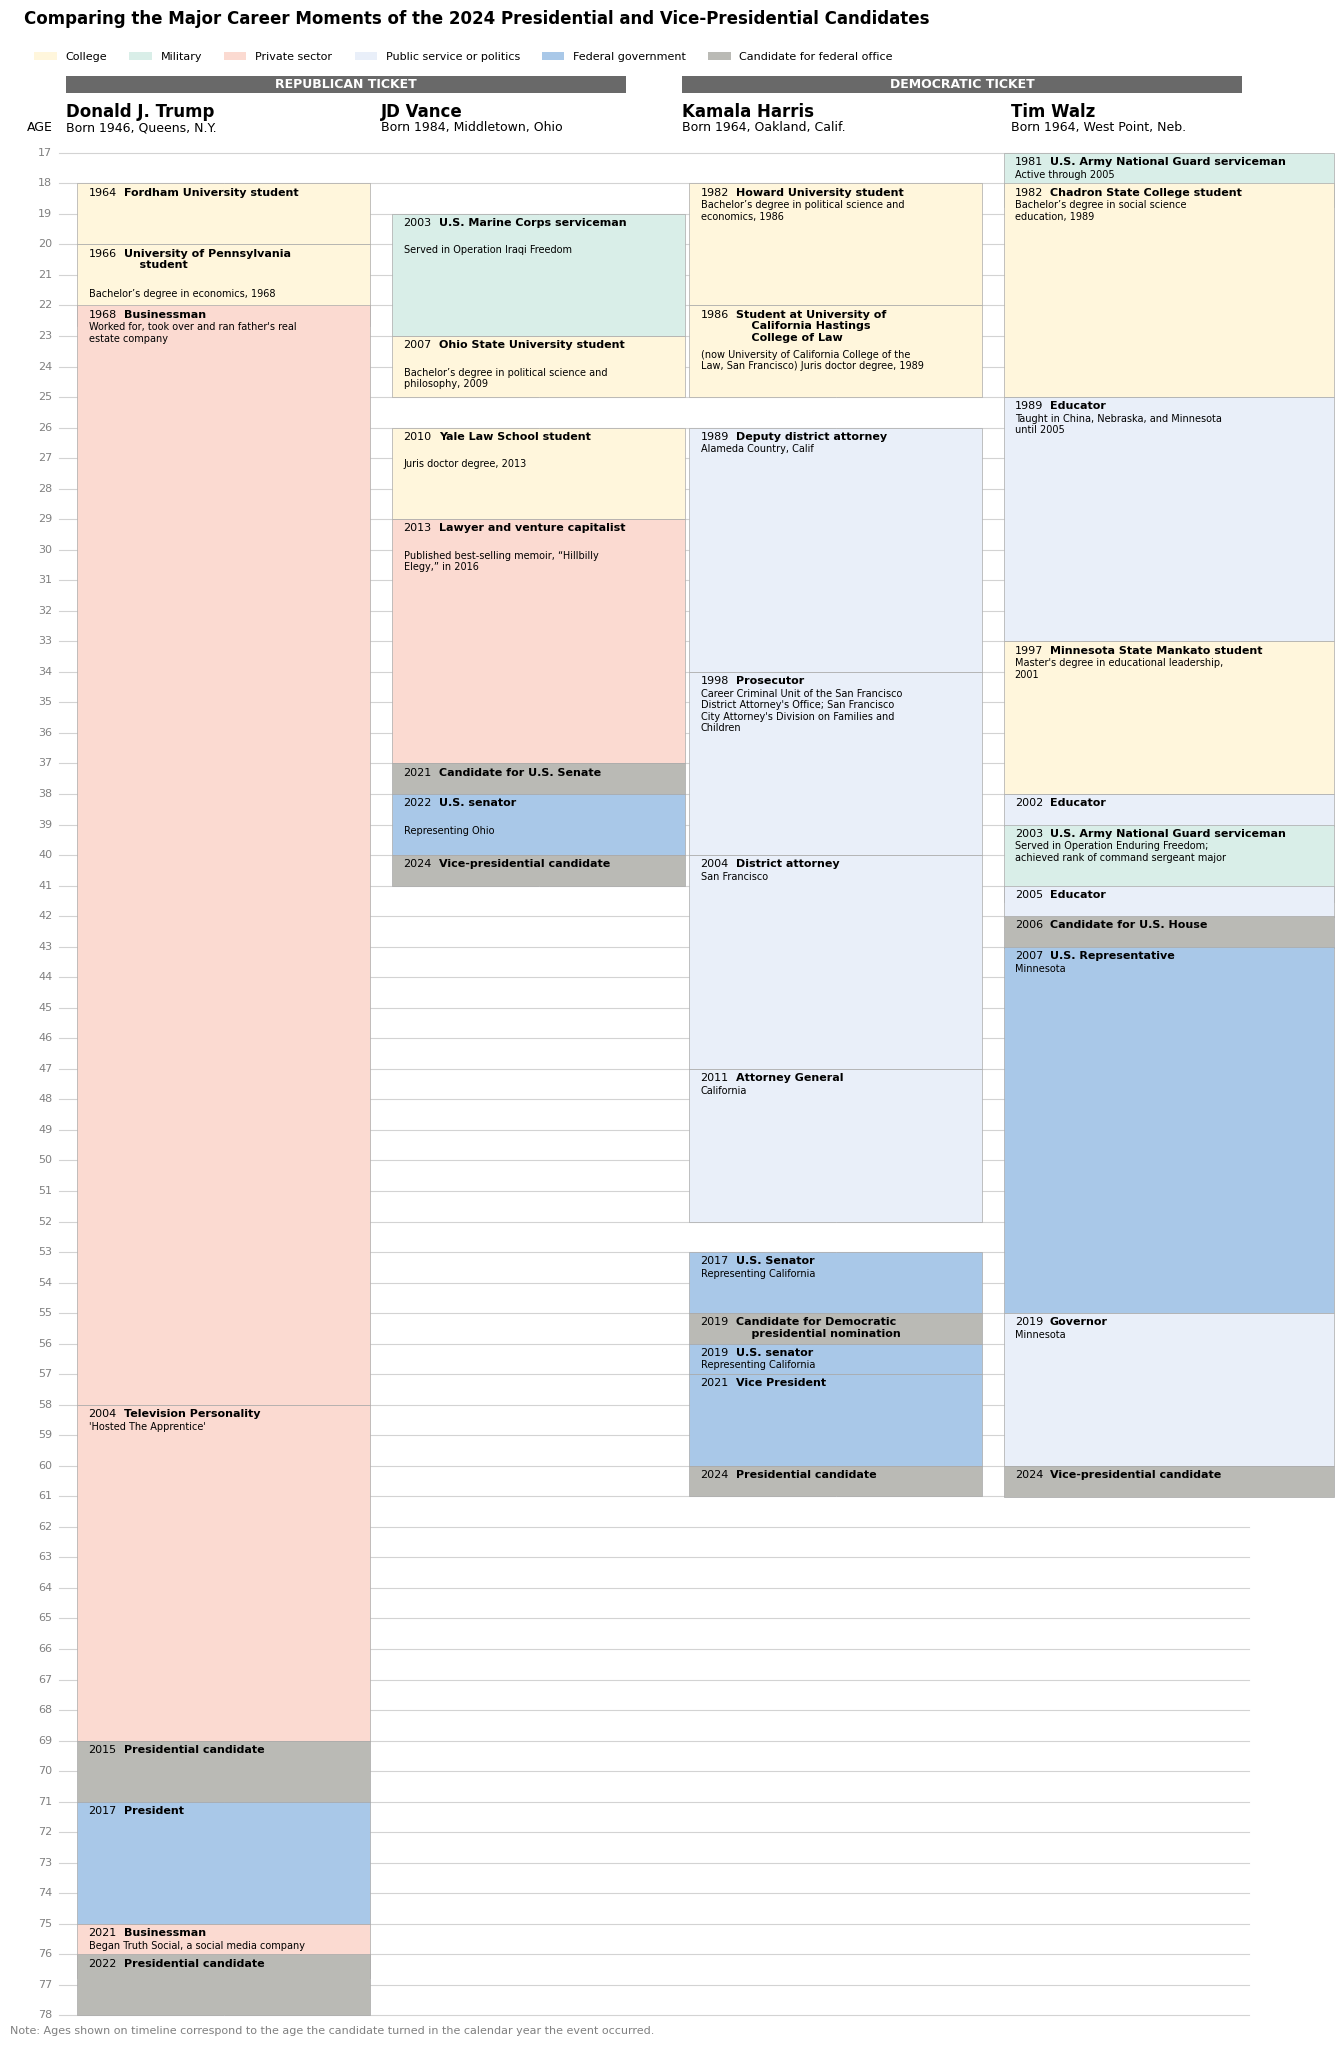

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.font_manager as fm
from matplotlib.patches import Rectangle
import textwrap

# --- Setup fonts ---
default_sans_serif = matplotlib.rcParams['font.sans-serif']
preferred_sans_serif = ['DejaVu Sans', 'Bitstream Vera Sans', 'Liberation Sans']
new_sans_serif_list = preferred_sans_serif + [f for f in default_sans_serif if f not in preferred_sans_serif and f.lower() != 'arial']
matplotlib.rcParams['font.sans-serif'] = new_sans_serif_list
matplotlib.rcParams['font.family'] = 'sans-serif'

# --- Candidates data ---
candidates = [
    {"name": "Donald J. Trump", "born": "Born 1946, Queens, N.Y.", "ticket": "REPUBLICAN TICKET"},
    {"name": "JD Vance",        "born": "Born 1984, Middletown, Ohio", "ticket": "REPUBLICAN TICKET"},
    {"name": "Kamala Harris",   "born": "Born 1964, Oakland, Calif.",  "ticket": "DEMOCRATIC TICKET"},
    {"name": "Tim Walz",        "born": "Born 1964, West Point, Neb.", "ticket": "DEMOCRATIC TICKET"}
]

# --- Color definitions for different event types ---
colors = {
    "College": "#fff6dc",
    "Military": "#d9eee8",
    "Private sector": "#fbdad1",
    "Public service or politics": "#e9eff9",
    "Federal government": "#a9c8e8",
    "Candidate for federal office": "#babab5"
}

# --- Timeline events for each candidate ---
events = [
    # Donald Trump
    {"candidate": "Donald J. Trump", "age_start": 18, "age_end": 20, "year": "1964", "title": "Fordham University student", "description": "", "color": colors["College"]},
    {"candidate": "Donald J. Trump", "age_start": 20, "age_end": 22, "year": "1966", "title": "University of Pennsylvania student", "description": "Bachelor’s degree in economics, 1968", "color": colors["College"]},
    {"candidate": "Donald J. Trump", "age_start": 22, "age_end": 58, "year": "1968", "title": "Businessman", "description": "Worked for, took over and ran father's real estate company", "color": colors["Private sector"]},
    {"candidate": "Donald J. Trump", "age_start": 58, "age_end": 69, "year": "2004", "title": "Television Personality", "description": "'Hosted The Apprentice'", "color": colors["Private sector"]},
    {"candidate": "Donald J. Trump", "age_start": 69, "age_end": 71, "year": "2015", "title": "Presidential candidate", "description": "", "color": colors["Candidate for federal office"]},
    {"candidate": "Donald J. Trump", "age_start": 71, "age_end": 75, "year": "2017", "title": "President", "description": "", "color": colors["Federal government"]},
    {"candidate": "Donald J. Trump", "age_start": 75, "age_end": 76, "year": "2021", "title": "Businessman", "description": "Began Truth Social, a social media company", "color": colors["Private sector"]},
    {"candidate": "Donald J. Trump", "age_start": 76, "age_end": 78, "year": "2022", "title": "Presidential candidate", "description": "", "color": colors["Candidate for federal office"]},

    # JD Vance
    {"candidate": "JD Vance", "age_start": 19, "age_end": 23, "year": "2003", "title": "U.S. Marine Corps serviceman", "description": "Served in Operation Iraqi Freedom", "color": colors["Military"]},
    {"candidate": "JD Vance", "age_start": 23, "age_end": 25, "year": "2007", "title": "Ohio State University student", "description": "Bachelor’s degree in political science and philosophy, 2009", "color": colors["College"]},
    {"candidate": "JD Vance", "age_start": 26, "age_end": 29, "year": "2010", "title": "Yale Law School student", "description": "Juris doctor degree, 2013", "color": colors["College"]},
    {"candidate": "JD Vance", "age_start": 29, "age_end": 37, "year": "2013", "title": "Lawyer and venture capitalist", "description": "Published best-selling memoir, “Hillbilly Elegy,” in 2016", "color": colors["Private sector"]},
    {"candidate": "JD Vance", "age_start": 37, "age_end": 38, "year": "2021", "title": "Candidate for U.S. Senate", "description": "", "color": colors["Candidate for federal office"]},
    {"candidate": "JD Vance", "age_start": 38, "age_end": 40, "year": "2022", "title": "U.S. senator", "description": "Representing Ohio", "color": colors["Federal government"]},
    {"candidate": "JD Vance", "age_start": 40, "age_end": 41, "year": "2024", "title": "Vice-presidential candidate", "description": "", "color": colors["Candidate for federal office"]},

    # Kamala Harris
    {"candidate": "Kamala Harris", "age_start": 18, "age_end": 22, "year": "1982", "title": "Howard University student", "description": "Bachelor’s degree in political science and economics, 1986", "color": colors["College"]},
    {"candidate": "Kamala Harris", "age_start": 22, "age_end": 25, "year": "1986", "title": "Student at University of California Hastings College of Law", "description": "(now University of California College of the Law, San Francisco) Juris doctor degree, 1989", "color": colors["College"]},
    {"candidate": "Kamala Harris", "age_start": 26, "age_end": 34, "year": "1989", "title": "Deputy district attorney", "description": "Alameda Country, Calif", "color": colors["Public service or politics"]},
    {"candidate": "Kamala Harris", "age_start": 34, "age_end": 40, "year": "1998", "title": "Prosecutor", "description": "Career Criminal Unit of the San Francisco District Attorney's Office; San Francisco City Attorney's Division on Families and Children", "color": colors["Public service or politics"]},
    {"candidate": "Kamala Harris", "age_start": 40, "age_end": 47, "year": "2004", "title": "District attorney", "description": "San Francisco", "color": colors["Public service or politics"]},
    {"candidate": "Kamala Harris", "age_start": 47, "age_end": 52, "year": "2011", "title": "Attorney General", "description": "California", "color": colors["Public service or politics"]},
    {"candidate": "Kamala Harris", "age_start": 53, "age_end": 55, "year": "2017", "title": "U.S. Senator", "description": "Representing California", "color": colors["Federal government"]},
    {"candidate": "Kamala Harris", "age_start": 55, "age_end": 56, "year": "2019", "title": "Candidate for Democratic presidential nomination", "description": "", "color": colors["Candidate for federal office"]},
    {"candidate": "Kamala Harris", "age_start": 56, "age_end": 57, "year": "2019", "title": "U.S. senator", "description": "Representing California", "color": colors["Federal government"]},
    {"candidate": "Kamala Harris", "age_start": 57, "age_end": 60, "year": "2021", "title": "Vice President", "description": "", "color": colors["Federal government"]},
    {"candidate": "Kamala Harris", "age_start": 60, "age_end": 61, "year": "2024", "title": "Presidential candidate", "description": "", "color": colors["Candidate for federal office"]},

    # Tim Walz
    {"candidate": "Tim Walz", "age_start": 17, "age_end": 18, "year": "1981", "title": "U.S. Army National Guard serviceman", "description": "Active through 2005", "color": colors["Military"]},
    {"candidate": "Tim Walz", "age_start": 18, "age_end": 25, "year": "1982", "title": "Chadron State College student", "description": "Bachelor’s degree in social science education, 1989", "color": colors["College"]},
    {"candidate": "Tim Walz", "age_start": 25, "age_end": 33, "year": "1989", "title": "Educator", "description": "Taught in China, Nebraska, and Minnesota until 2005", "color": colors["Public service or politics"]},
    {"candidate": "Tim Walz", "age_start": 33, "age_end": 38, "year": "1997", "title": "Minnesota State Mankato student", "description": "Master's degree in educational leadership, 2001", "color": colors["College"]},
    {"candidate": "Tim Walz", "age_start": 38, "age_end": 39, "year": "2002", "title": "Educator", "description": "", "color": colors["Public service or politics"]},
    {"candidate": "Tim Walz", "age_start": 39, "age_end": 41, "year": "2003", "title": "U.S. Army National Guard serviceman", "description": "Served in Operation Enduring Freedom; achieved rank of command sergeant major", "color": colors["Military"]},
    {"candidate": "Tim Walz", "age_start": 41, "age_end": 42, "year": "2005", "title": "Educator", "description": "", "color": colors["Public service or politics"]},
    {"candidate": "Tim Walz", "age_start": 42, "age_end": 43, "year": "2006", "title": "Candidate for U.S. House", "description": "", "color": colors["Candidate for federal office"]},
    {"candidate": "Tim Walz", "age_start": 43, "age_end": 55, "year": "2007", "title": "U.S. Representative", "description": "Minnesota", "color": colors["Federal government"]},
    {"candidate": "Tim Walz", "age_start": 55, "age_end": 60, "year": "2019", "title": "Governor", "description": "Minnesota", "color": colors["Public service or politics"]},
    {"candidate": "Tim Walz", "age_start": 60, "age_end": 61, "year": "2024", "title": "Vice-presidential candidate", "description": "", "color": colors["Candidate for federal office"]}
]

# --- Create a figure with 4 subplots (axes) side by side ---
fig, axes = plt.subplots(1, 4, figsize=(14, 21))
for ax in axes:
    ax.set_axis_off()  # Hide the axis for a cleaner look

# --- Title at top of the figure ---
title_y = 0.97
fig.text(0.05, title_y,
         "Comparing the Major Career Moments of the 2024 Presidential and Vice-Presidential Candidates",
         fontsize=12, fontweight='bold', ha='left', va='top')

# --- Legend for event types ---
legend_y = 0.93
legend_bbox_y = 0.955
legend_patches = [mpatches.Patch(facecolor=c, label=label) for label, c in colors.items()]
fig.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(0.05, legend_bbox_y), ncol=len(colors), frameon=False, fontsize=8)

# --- Gray bars indicating REPUBLICAN TICKET and DEMOCRATIC TICKET ---
bar_y = 0.9305
bar_height = 0.008
bar_top = bar_y + bar_height
rep_bar_x0 = 0.08
rep_bar_x1 = 0.48
rep_width = rep_bar_x1 - rep_bar_x0
dem_bar_x0 = 0.52
dem_bar_x1 = 0.92
dem_width = dem_bar_x1 - dem_bar_x0

fig.patches.append(mpatches.Rectangle((rep_bar_x0, bar_y), rep_width, bar_height,
                                      facecolor='dimgray', transform=fig.transFigure, clip_on=False))
fig.patches.append(mpatches.Rectangle((dem_bar_x0, bar_y), dem_width, bar_height,
                                      facecolor='dimgray', transform=fig.transFigure, clip_on=False))

fig.text(rep_bar_x0 + rep_width/2, bar_y + bar_height/2, "REPUBLICAN TICKET",
         ha='center', va='center', color='white', fontsize=9, fontweight='bold', transform=fig.transFigure)
fig.text(dem_bar_x0 + dem_width/2, bar_y + bar_height/2, "DEMOCRATIC TICKET",
         ha='center', va='center', color='white', fontsize=9, fontweight='bold', transform=fig.transFigure)

# --- Positioning candidate names and birth info ---
vertical_gap = 0.03
name_fig_y = bar_top + vertical_gap
born_fig_y = name_fig_y + 0.03
num_candidates = len(candidates)
fig_left_margin = 0.05
fig_right_margin = 0.95
plot_width = fig_right_margin - fig_left_margin
width_per_candidate = plot_width / num_candidates
horizontal_padding = 0.03

candidate_x_starts = [fig_left_margin + i * width_per_candidate + horizontal_padding for i in range(num_candidates)]
candidate_x_starts[0] = max(fig_left_margin + horizontal_padding, rep_bar_x0)
candidate_x_starts[2] = dem_bar_x0

for i, cand in enumerate(candidates):
    x_start = candidate_x_starts[i]
    name_y_coord = bar_y - 0.005
    born_y_coord = name_y_coord - 0.0085
    fig.text(x_start, name_y_coord, cand['name'], ha='left', va='top',
             fontsize=12, fontweight='bold', transform=fig.transFigure)
    fig.text(x_start, born_y_coord, cand['born'], ha='left', va='top',
             fontsize=9, transform=fig.transFigure)

plt.subplots_adjust(left=fig_left_margin, right=fig_right_margin)

# --- Age-related lines on the timeline ---
age_start = 17
age_end = 78
total_ages = age_end - age_start + 1
grid_top = born_y_coord - 0.015
grid_bottom = 0.0005
grid_height = grid_top - grid_bottom

# Label for the AGE column
label_y = grid_top + 0.012
age_label_x = rep_bar_x0 - 0.01
fig.text(age_label_x, label_y, "AGE", ha='right', va='center', fontsize=9, color='black', transform=fig.transFigure)

# Draw grid lines and age labels
for i, age in enumerate(range(age_start, age_end + 1)):
    y_pos = grid_top - (i / total_ages) * grid_height
    line_x0 = rep_bar_x0 - 0.005
    line_x1 = dem_bar_x1 + 0.005
    fig.lines.append(matplotlib.lines.Line2D([line_x0, line_x1], [y_pos, y_pos],
                                             color='lightgray', linewidth=0.8, transform=fig.transFigure, zorder=0))
    fig.text(age_label_x, y_pos, str(age), ha='right', va='center', fontsize=8, color='gray', transform=fig.transFigure)

# --- Plotting each event block for each candidate ---
candidate_name_to_index = {cand["name"]: i for i, cand in enumerate(candidates)}
wrap_width_chars_title = 30
wrap_width_chars_desc = 45
line_height_factor_title = 0.013
line_height_factor_desc = 0.011
year_title_gap = 0.025

for evt in events:
    col_idx = candidate_name_to_index[evt["candidate"]]
    col_width = width_per_candidate * 0.93
    if evt["candidate"] == "Tim Walz":
       col_width = width_per_candidate * 1.05
    col_center_offset = (width_per_candidate - col_width) / 2
    base_x0 = candidate_x_starts[col_idx] + col_center_offset
    margin_left = 0.005
    if col_idx == 0:
        x0 = max(base_x0, rep_bar_x0 + margin_left)
    elif col_idx == 2:
        x0 = dem_bar_x0 + margin_left
    else:
        x0 = base_x0
    width = col_width
    clamped_age_start = max(evt["age_start"], age_start)
    clamped_age_end = min(evt["age_end"], age_end)
    y_start = grid_top - ((clamped_age_start - age_start) / total_ages) * grid_height
    y_end = grid_top - ((clamped_age_end - age_start) / total_ages) * grid_height

    # Customize wrapping for Tim Walz's title (avoid wrapping by single word)
    if evt["candidate"] == "Tim Walz":
        custom_wrap_width = 80
    else:
        custom_wrap_width = wrap_width_chars_title

    # Wrap the title and description
    wrapped_title = textwrap.fill(
        evt["title"],
        width=custom_wrap_width,
        initial_indent="",
        subsequent_indent="    ",
        break_long_words=False,
        replace_whitespace=False
    )
    wrapped_description = ""
    if evt["description"]:
        wrapped_description = textwrap.fill(
            evt["description"],
            width=wrap_width_chars_desc,
            break_long_words=False,
            replace_whitespace=False
        )

    # Calculate minimum height for the rectangle
    num_title_lines = wrapped_title.count('\n') + 1
    num_desc_lines = wrapped_description.count('\n') + 1 if evt["description"] else 0
    title_block_height = num_title_lines * line_height_factor_title
    desc_block_height = num_desc_lines * line_height_factor_desc
    padding = 0.002
    min_required_height = title_block_height + desc_block_height + padding

    # Some candidates' blocks shrink to actual timeline; others have a minimum block size
    if evt["candidate"] in ["JD Vance", "Kamala Harris"]:
      height = y_start - y_end
    else:
      height = max(y_start - y_end, min_required_height)

    actual_y_end = y_start - height

    # Draw the rectangle background
    rect = Rectangle((x0, actual_y_end), width, height, transform=fig.transFigure,
                     facecolor=evt["color"], edgecolor='darkgrey', linewidth=0.5, clip_on=True)
    fig.patches.append(rect)

    # White line in the middle of the rectangle (visual divider)
    line_x = x0 + width / 2
    fig.lines.append(
        matplotlib.lines.Line2D(
            [line_x, line_x],
            [actual_y_end, y_start],
            color='white',
            linewidth=0.6,
            transform=fig.transFigure,
            zorder=1,
            clip_on=True
        )
    )

    # Place the text (year, title, and description)
    text_x_start = x0 + 0.008
    title_x_start = text_x_start + year_title_gap
    title_y_pos = y_start - 0.002

    # Year label
    fig.text(
        text_x_start, title_y_pos,
        evt["year"],
        ha='left', va='top',
        fontweight='normal',
        fontsize=8,
        transform=fig.transFigure,
        clip_on=True
    )

    # Title label
    fig.text(
        title_x_start, title_y_pos,
        wrapped_title,
        ha='left', va='top',
        fontweight='bold',
        fontsize=8,
        transform=fig.transFigure,
        clip_on=True
    )

    # Description (if any)
    if evt["description"]:
      if evt["candidate"] == "JD Vance":
          desc_y_pos = title_y_pos - title_block_height
      elif evt["candidate"] == "Kamala Harris":
          if num_title_lines > 1:
              desc_y_pos = title_y_pos - title_block_height + 0.020
          else:
              desc_y_pos = title_y_pos - title_block_height + 0.007
      elif evt["candidate"] == "Donald J. Trump":
          desc_y_pos = title_y_pos - title_block_height + 0.007
      elif evt["candidate"] == "Tim Walz":
        if num_title_lines > 1:
            desc_y_pos = title_y_pos - title_block_height - 0.0001
        else:
            desc_y_pos = title_y_pos - title_block_height + 0.007
      else:
          line_gap = 0.001 if num_title_lines == 1 else 0.0005
          desc_y_pos = title_y_pos - title_block_height - line_gap

      fig.text(
          text_x_start, desc_y_pos,
          wrapped_description,
          ha='left', va='top',
          fontweight='normal',
          fontsize=7,
          transform=fig.transFigure,
          clip_on=True
      )

# --- Footnote at the bottom of the figure ---
footnote_text = (
    "Note: Ages shown on timeline correspond to the age the candidate turned "
    "in the calendar year the event occurred."
)
fig.text(
    0.5,
    0.01,
    footnote_text,
    ha='right',
    va='top',
    fontsize=8,
    color='gray',
    transform=fig.transFigure,
    clip_on=False
)

plt.show()


<img src="https://static01.nyt.com/images/2024/09/25/learning/candidate-timeline-age-graph/candidate-timeline-age-graph-superJumbo.png?quality=75&auto=webp" width=800>